In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
coyote_results_file = "coyote_results.csv"
RL_results_file = "dynamic_tok_agent_random_results.csv"
best_RL_results_file = "dynamic_tok_agent_results.csv"
scalar_code_results_file = "results_scalar.csv"
greedy_trs_results_file = "egraph_based_greedy_trs.csv"
# generate graph to display compile times of chehab and coyote and take into account timeout :
benchmarks = [
     "Box Blur 3 × 3", "Box Blur 4 × 4","Box Blur 5 × 5",

    "Dot Product 4",  "Dot Product 8","Dot Product 16", "Dot Product 32",

     "Hamm. Dist. 4",  "Hamm. Dist. 8","Hamm. Dist. 16",  "Hamm. Dist. 32",

      "L2 Distance 4",  "L2 Distance 8","L2 Distance 16",  "L2 Distance 32",

     "Linear Reg. 4",  "Linear Reg. 8","Linear Reg. 16", "Linear Reg. 32",

   "Poly. Reg. 4", "Poly. Reg. 8", "Poly. Reg. 16",  "Poly. Reg. 32",

     "Gx 3 × 3", "Gx 4 × 4", "Gx 5 × 5",

     "Gy 3 × 3", "Gy 4 × 4", "Gy 5 × 5",

     "Rob. Cross 3 × 3", "Rob. Cross 4 × 4", "Rob. Cross 5 × 5",

     "Mat. Mul. 3 × 3", "Mat. Mul. 4 × 4", "Mat. Mul. 5 × 5",

     "Max 3","Max 4","Max 5",

     "Sort 3","Sort 4",
    "Tree 50-50-5", "Tree 50-50-10", "Tree 100-50-5", "Tree 100-50-10", "Tree 100-100-5", "Tree 100-100-10"
]
########################################################################################################
Chehab_benchmarks_map = {
     "Box Blur 3 × 3" : "box_blur_3", "Box Blur 4 × 4" : "box_blur_4", "Box Blur 5 × 5" : "box_blur_5",

     #"Dot Product 3", "Dot Product 4", "Dot Product 5", "Dot Product 8","Dot Product 16", "Dot Product 25", "Dot Product 32",

     "Dot Product 3" : "dot_product_3", "Dot Product 4" : "dot_product_4", "Dot Product 5" : "dot_product_5",
     "Dot Product 8" : "dot_product_8", "Dot Product 16" : "dot_product_16", "Dot Product 25" : "dot_product_25",
     "Dot Product 32" : "dot_product_32",

     "Hamm. Dist. 3" : "hamming_dist_3", "Hamm. Dist. 4" : "hamming_dist_4" , "Hamm. Dist. 5" : "hamming_dist_5" ,
     "Hamm. Dist. 8" : "hamming_dist_8", "Hamm. Dist. 16" : "hamming_dist_16" , "Hamm. Dist. 25" : "hamming_dist_25",
     "Hamm. Dist. 32" : "hamming_dist_32",

     "L2 Distance 3" : "l2_distance_3", "L2 Distance 4" : "l2_distance_4" , "L2 Distance 5" : "l2_distance_5" ,
     "L2 Distance 8" : "l2_distance_8", "L2 Distance 16" : "l2_distance_16" , "L2 Distance 25" : "l2_distance_25",
     "L2 Distance 32" : "l2_distance_32",

     "Linear Reg. 3" : "lin_reg_3", "Linear Reg. 4" : "lin_reg_4", "Linear Reg. 5" : "lin_reg_5",
     "Linear Reg. 8" : "lin_reg_8", "Linear Reg. 16" : "lin_reg_16"  , "Linear Reg. 25" : "lin_reg_25",
     "Linear Reg. 32" : "lin_reg_32",

     "Poly. Reg. 3" : "poly_reg_3", "Poly. Reg. 4" : "poly_reg_4", "Poly. Reg. 5" : "poly_reg_5",
     "Poly. Reg. 8" : "poly_reg_8", "Poly. Reg. 16" : "poly_reg_16", "Poly. Reg. 25" : "poly_reg_25",
     "Poly. Reg. 32" : "poly_reg_32",

     "Gx 3 × 3" : "gx_kernel_3", "Gx 4 × 4" : "gx_kernel_4", "Gx 5 × 5" : "gx_kernel_5",

     "Gy 3 × 3" : "gy_kernel_3", "Gy 4 × 4" : "gy_kernel_4", "Gy 5 × 5" : "gy_kernel_5",

     "Rob. Cross 3 × 3" : "roberts_cross_3", "Rob. Cross 4 × 4" : "roberts_cross_4", "Rob. Cross 5 × 5" : "roberts_cross_5",

     "Mat. Mul. 3 × 3" : "matrix_mul_3", "Mat. Mul. 4 × 4" : "matrix_mul_4", "Mat. Mul. 5 × 5" : "matrix_mul_5",

     "Sort 3" : "sort_3", "Sort 4" : "sort_4",

     "Max 5" : "max_5", "Max 4" : "max_4", "Max 3" : "max_3",

    "Tree 50-50-5":"tree_50-50-5","Tree 50-50-10":"tree_50-50-10",
    "Tree 100-50-5":"tree_100-50-5","Tree 100-50-10":"tree_100-50-10",
    "Tree 100-100-5":"tree_100-100-5","Tree 100-100-10":"tree_100-100-10"
}
########################################################################################################
Coyote_benchmarks_map = {

     "Dot Product 4" : "dot_product_4x4_fully", 
     "Dot Product 8"  : "dot_product_8x8_fully",
     "Dot Product 16" : "dot_product_16x16_fully", 
     "Dot Product 32" : "dot_product_32x32_fully",

     "Hamm. Dist. 4" : "hamming_distance_4", "Hamm. Dist. 3"  : "hamming_distance_3",
     "Hamm. Dist. 5"  : "hamming_distance_5", "Hamm. Dist. 8"  : "hamming_distance_8",
     "Hamm. Dist. 16" : "hamming_distance_16","Hamm. Dist. 25" : "hamming_distance_25",
     "Hamm. Dist. 32" : "hamming_distance_32",

     "L2 Distance 4" : "l2_distance_4" , "L2 Distance 3"  : "l2_distance_3",
     "L2 Distance 5"  : "l2_distance_5", "L2 Distance 8"  : "l2_distance_8",
     "L2 Distance 16" : "l2_distance_16", "L2 Distance 25" : "l2_distance_25",
     "L2 Distance 32" : "l2_distance_32",

     "Linear Reg. 4" : "linear_reg_4", "Linear Reg. 3"  : "linear_reg_3",
     "Linear Reg. 5"  : "linear_reg_5", "Linear Reg. 8"  : "linear_reg_8",
     "Linear Reg. 16" : "linear_reg_16","Linear Reg. 25" : "linear_reg_25",
     "Linear Reg. 32" : "linear_reg_32",

     "Poly. Reg. 4" : "poly_reg_4", "Poly. Reg. 3"  : "poly_reg_3",
     "Poly. Reg. 5"  : "poly_reg_5","Poly. Reg. 8"  : "poly_reg_8",
     "Poly. Reg. 16" : "poly_reg_16","Poly. Reg. 25" : "poly_reg_25",
     "Poly. Reg. 32" : "poly_reg_32",

     "Box Blur 3 × 3" : "box_blur_3x3", "Box Blur 4 × 4" : "box_blur_4x4", "Box Blur 5 × 5" : "box_blur_5x5",

     "Gx 3 × 3" : "gx_kernel_3x3" , "Gx 4 × 4" : "gx_kernel_4x4" , "Gx 5 × 5" : "gx_kernel_5x5" ,

     "Gy 3 × 3" : "gy_kernel_3x3" , "Gy 4 × 4" : "gy_kernel_4x4" , "Gy 5 × 5" : "gy_kernel_5x5" ,

     "Rob. Cross 3 × 3" : "roberts_cross_3x3", "Rob. Cross 4 × 4" : "roberts_cross_4x4", "Rob. Cross 5 × 5" : "roberts_cross_5x5",

     "Mat. Mul. 3 × 3" : "matmul_3x3_fully", "Mat. Mul. 4 × 4" : "matmul_4x4_fully", "Mat. Mul. 5 × 5" : "matmul_5x5_fully",

     "Sort 3" : "sort_3_packed_fully", "Sort 4" : "sort_4_packed_fully",

     "Max 5" : "max_5_packed_fully","Max 4" : "max_4_packed_fully", "Max 3" : "max_3_packed_fully",
    "Tree 50-50-5":"tree_50-50-5","Tree 50-50-10":"tree_50-50-10",
    "Tree 100-50-5":"tree_100-50-5","Tree 100-50-10":"tree_100-50-10",
    "Tree 100-100-5":"tree_100-100-5","Tree 100-100-10":"tree_100-100-10"
}

In [3]:

def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Execution Time (s)", fontsize=16)

    bar = ax.bar(0, 0, color='none', hatch='//', edgecolor=hatch_color, label="N/A (Noise budget exhaustion)")
    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 2*10**3)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()


/tmp/ipykernel_31942/1846409306.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


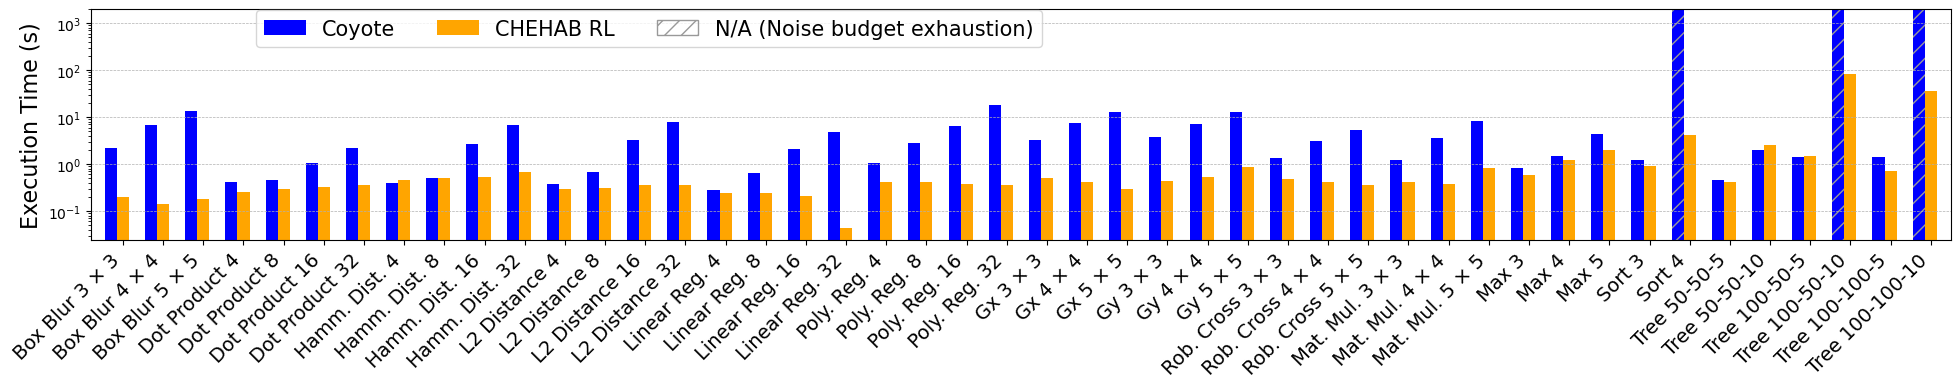

In [4]:

########################################################################################################
####################Load results #######################################################################
Chehab_rows = []
Coyote_rows = []
with open(best_RL_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
#######################################################################################################
#######################################################################################################
Coyote_execution_times = []
Chehab_execution_times = []
for benchmark in benchmarks : 
     found = False
     for row in Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         exec_time = float(row[10])
                    except : 
                         exec_time = float('inf') 
                    Chehab_execution_times.append(exec_time)
                    found= True
                    break
               else : 
                    break
     if not found : 
          print("not found", benchmark)
          Chehab_execution_times.append(0)
     #####################################################
     found = False
     for row in Coyote_rows :
          if row[0] ==  Coyote_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         exec_time = float(row[9])
                    except : 
                         exec_time = float('inf')
     
                    Coyote_execution_times.append(exec_time)
                    found= True
                    break
               else : 
                    break
     if not found : 
          Coyote_execution_times.append(0)

times = {
    "Coyote": np.array(Coyote_execution_times) , # execution time for Coyote
    "CHEHAB RL": np.array(Chehab_execution_times)  # execution time for CHEHAB
}
labels = [
    "Coyote",
    "CHEHAB RL"
]

colors = ['Blue', 'Orange']
plot_histogram(benchmarks, times, labels, colors)

In [5]:

def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Compile Time (s)", fontsize=16)

    bar = ax.bar(0, 0, color='none', hatch='//', edgecolor=hatch_color, label="Compilation Timeout")
    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 2*10**3)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()


/tmp/ipykernel_31942/3577442715.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


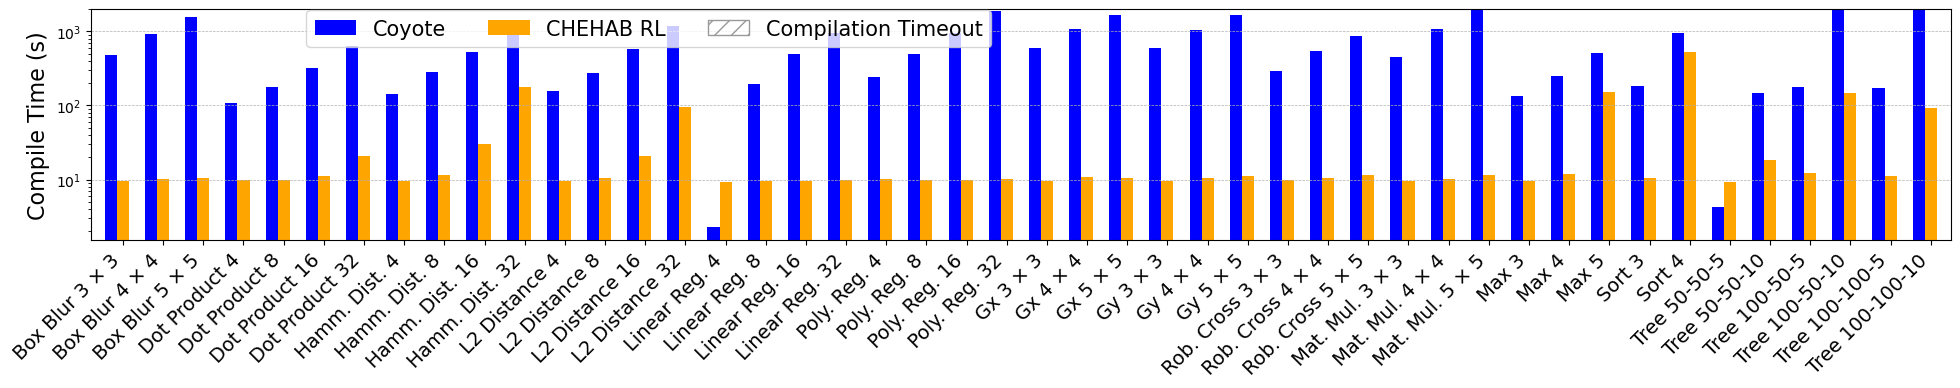

In [6]:

########################################################################################################
####################Load results #######################################################################
Chehab_rows = []
Coyote_rows = []
with open(best_RL_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
#######################################################################################################
#######################################################################################################
Coyote_compile_times = []
Chehab_compile_times = []
for benchmark in benchmarks : 
     found = False
     for row in Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[9])
                    except : 
                         comp_time = float('inf') 
                    Chehab_compile_times.append(comp_time)
               else : 
                    Chehab_compile_times.append(float('inf'))
               found= True 
               break
     if not found : 
          Chehab_compile_times.append(0)## means benchmark results are lacking
     #####################################################
     found = False
     for row in Coyote_rows :
          if row[0] ==  Coyote_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[8])
                    except : 
                         comp_time = float('inf')
     
                    Coyote_compile_times.append(comp_time)
               else : 
                    Coyote_compile_times.append(float('inf'))
               found= True
               break
     if not found : 
          Coyote_compile_times.append(0)

times = {
    "Coyote": np.array(Coyote_compile_times) , # execution time for Coyote
    "CHEHAB RL": np.array(Chehab_compile_times)  # execution time for CHEHAB
}
labels = [
    "Coyote",
    "CHEHAB RL"
]

colors = ['Blue', 'Orange']
plot_histogram(benchmarks, times, labels, colors)


In [7]:
def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Execution Time (s)", fontsize=16)

    bar = ax.bar(0, 0, color='none', hatch='//', edgecolor=hatch_color, label="N/A (Noise budget exhaustion)")
    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 2*10**3)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()



/tmp/ipykernel_31942/1368257697.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


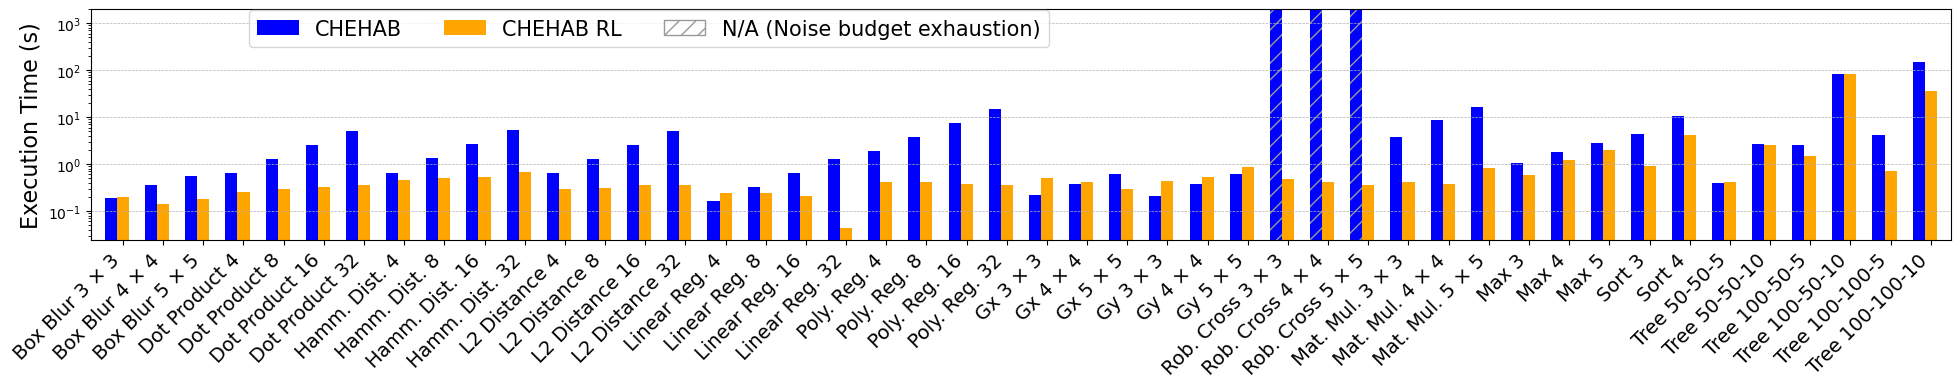

In [9]:

########################################################################################################
####################Load results #######################################################################
best_RL_results_rows = []
RL_results_rows = []
with open(best_RL_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        best_RL_results_rows = list(reader)
###########################################
with open(scalar_code_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        RL_results_rows = list(reader)
#######################################################################################################
#######################################################################################################
RL_compile_times = []
best_RL_compile_times = []
for benchmark in benchmarks : 
     found = False
     for row in best_RL_results_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf') 
                    best_RL_compile_times.append(comp_time)
               else : 
                    best_RL_compile_times.append(float('inf'))
               found= True 
               break
     if not found : 
          best_RL_compile_times.append(0)## means benchmark results are lacking
     #####################################################
     found = False
     for row in RL_results_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf')
     
                    RL_compile_times.append(comp_time)
               else : 
                    RL_compile_times.append(float('inf'))
               found= True
               break
     if not found : 
          RL_compile_times.append(0)

labels = [
    "CHEHAB",
    "CHEHAB RL"
]
times = {
    "CHEHAB": np.array(RL_compile_times) , # execution time for Coyote
    "CHEHAB RL": np.array(best_RL_compile_times)  # execution time for CHEHAB
}

colors = ['Blue', 'Orange']
plot_histogram(benchmarks, times, labels, colors)


/tmp/ipykernel_263108/1368257697.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


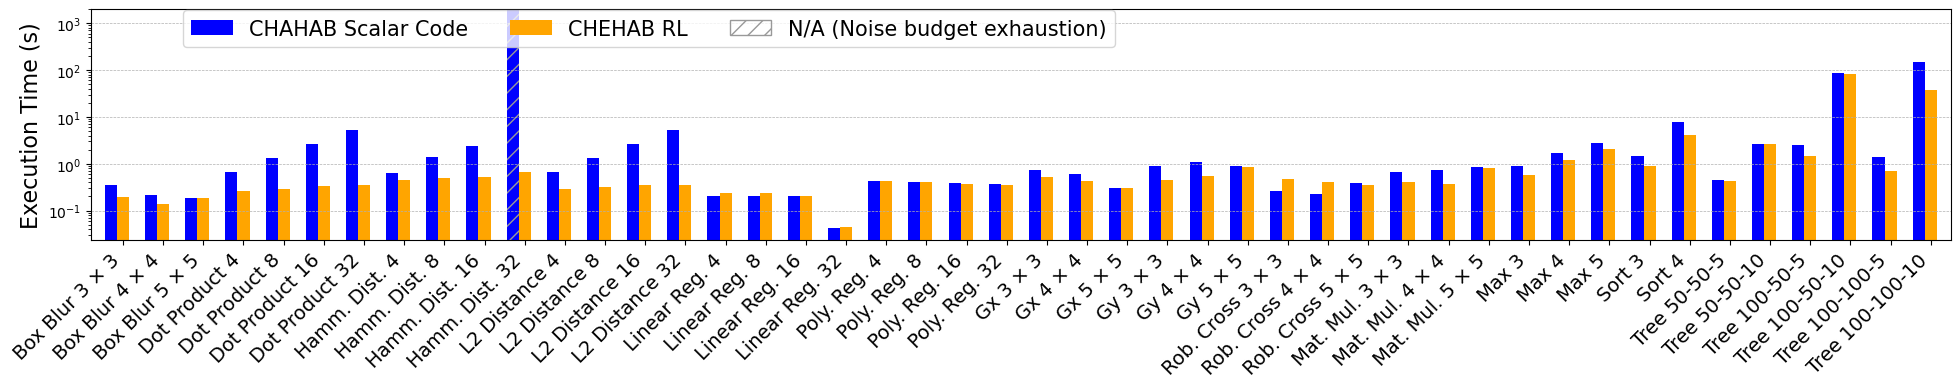

In [66]:

########################################################################################################
####################Load results #######################################################################
best_RL_results_rows = []
RL_results_rows = []
with open(best_RL_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        best_RL_results_rows = list(reader)
###########################################
with open(RL_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        RL_results_rows = list(reader)
#######################################################################################################
#######################################################################################################
RL_compile_times = []
best_RL_compile_times = []
for benchmark in benchmarks : 
     found = False
     for row in best_RL_results_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf') 
                    best_RL_compile_times.append(comp_time)
               else : 
                    best_RL_compile_times.append(float('inf'))
               found= True 
               break
     if not found : 
          best_RL_compile_times.append(0)## means benchmark results are lacking
     #####################################################
     found = False
     for row in RL_results_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf')
     
                    RL_compile_times.append(comp_time)
               else : 
                    RL_compile_times.append(float('inf'))
               found= True
               break
     if not found : 
          RL_compile_times.append(0)

labels = [
    "CHAHAB Scalar Code",
    "CHEHAB RL"
]
times = {
    "CHAHAB Scalar Code": np.array(RL_compile_times) , # execution time for Coyote
    "CHEHAB RL": np.array(best_RL_compile_times)  # execution time for CHEHAB
}

colors = ['Blue', 'Orange']
plot_histogram(benchmarks, times, labels, colors)


In [67]:
def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Execution Time (s)", fontsize=16)

    bar = ax.bar(0, 0, color='none', hatch='//', edgecolor=hatch_color, label="N/A (Noise budget exhaustion)")
    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 2*10**3)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()



/tmp/ipykernel_263108/1368257697.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


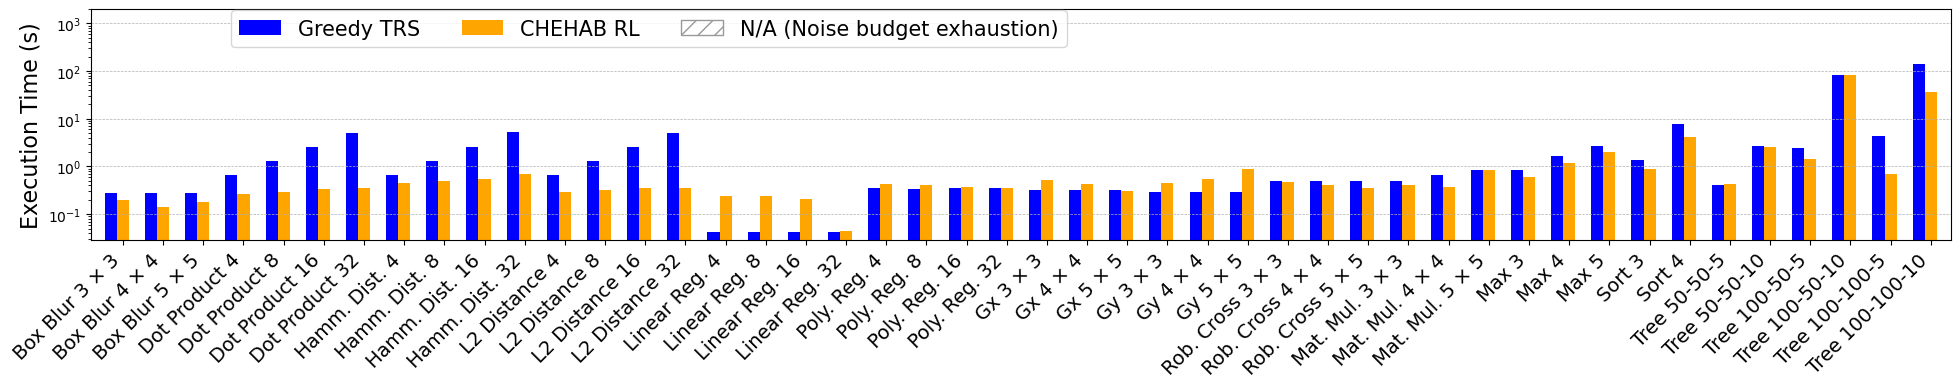

In [68]:

########################################################################################################
####################Load results #######################################################################
best_RL_results_rows = []
RL_results_rows = []
with open(best_RL_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        best_RL_results_rows = list(reader)
###########################################
with open(greedy_trs_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        RL_results_rows = list(reader)
#######################################################################################################
#######################################################################################################
RL_compile_times = []
best_RL_compile_times = []
for benchmark in benchmarks : 
     found = False
     for row in best_RL_results_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf') 
                    best_RL_compile_times.append(comp_time)
               else : 
                    best_RL_compile_times.append(float('inf'))
               found= True 
               break
     if not found : 
          best_RL_compile_times.append(0)## means benchmark results are lacking
     #####################################################
     found = False
     for row in RL_results_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf')
     
                    RL_compile_times.append(comp_time)
               else : 
                    RL_compile_times.append(float('inf'))
               found= True
               break
     if not found : 
          RL_compile_times.append(0)

labels = [
    "Greedy TRS",
    "CHEHAB RL"
]
times = {
    "Greedy TRS": np.array(RL_compile_times) , # execution time for Coyote
    "CHEHAB RL": np.array(best_RL_compile_times)  # execution time for CHEHAB
}

colors = ['Blue', 'Orange']
plot_histogram(benchmarks, times, labels, colors)


In [69]:
def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Consumed Noise Budget", fontsize=12)

    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    #ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 369)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()



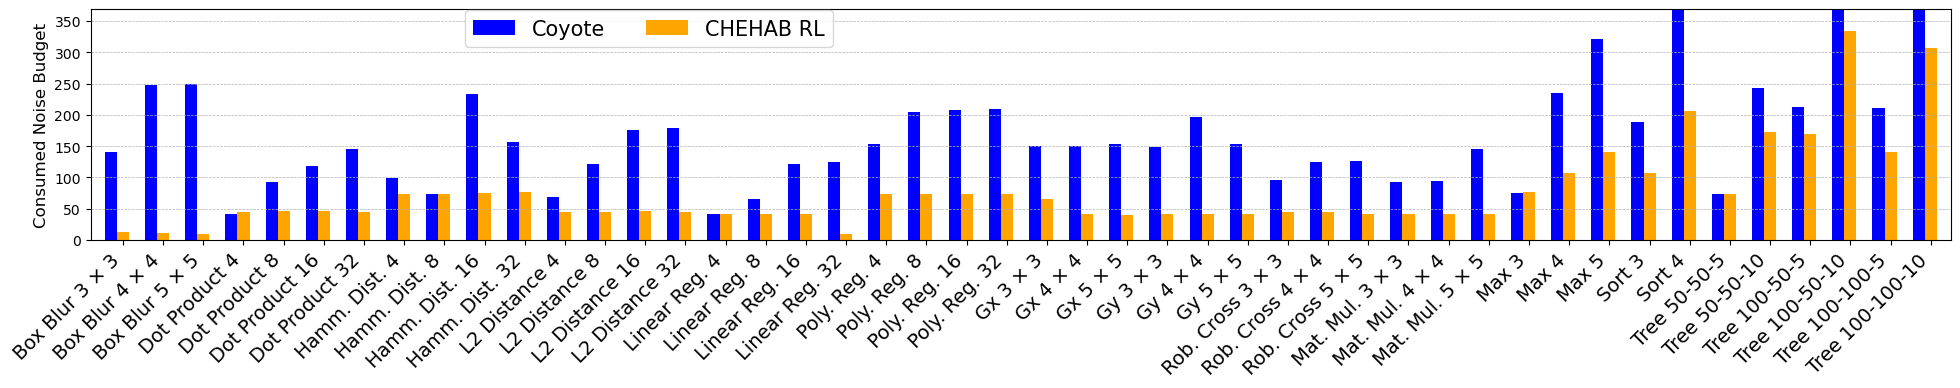

In [70]:

########################################################################################################
####################Load results #######################################################################
Chehab_rows = []
Coyote_rows = []
with open(best_RL_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
#######################################################################################################
#######################################################################################################
Coyote_execution_times = []
Chehab_execution_times = []
for benchmark in benchmarks : 
     found = False
     for row in Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         exec_time = 369 -  float(row[11])
                    except : 
                         exec_time = float('inf') 
                    Chehab_execution_times.append(exec_time)
                    found= True
                    break
               else : 
                    break
     if not found : 
          print("not found", benchmark)
          Chehab_execution_times.append(0)
     #####################################################
     found = False
     for row in Coyote_rows :
          if row[0] ==  Coyote_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         exec_time = 369 - float(row[10])
                    except : 
                         exec_time = float('inf')
     
                    Coyote_execution_times.append(exec_time)
                    found= True
                    break
               else : 
                    break
     if not found : 
          Coyote_execution_times.append(0)

times = {
    "Coyote": np.array(Coyote_execution_times) , # execution time for Coyote
    "CHEHAB RL": np.array(Chehab_execution_times)  # execution time for CHEHAB
}
labels = [
    "Coyote",
    "CHEHAB RL"
]

colors = ['Blue', 'Orange']
plot_histogram(benchmarks, times, labels, colors)

In [71]:
########################### Generate Latex code ###########################################
table_header = """
\\begin{tabular}{l|cccccc|cccccc:c:c|cccccc:c:c}
        \\hline
        \\multirow{2}*{Kernel}
        & \\multicolumn{6}{c|}{Initial}
        & \\multicolumn{8}{c|}{CHEHAB RL}
        & \\multicolumn{8}{c}{Coyote}  \\\\
        {}
        &  $\\cup$ &     $\\cup^\\otimes$  & $\\otimes$ &     $\\circlearrowright$  & $\\odot$ & $\\oplus$
        &  $\\cup$ & \\h{$\\cup^\\otimes$}  & $\\otimes$ & \\h{$\\circlearrowright$} & $\\odot$ & $\\oplus$ & \\h{CNB} & \\h{CT}
        &  $\\cup$ & \\h{$\\cup^\\otimes$}  & $\\otimes$ & \\h{$\\circlearrowright$} & $\\odot$ & $\\oplus$ & \\h{CNB} & \\h{CT}
        \\\\ \\hline
"""
table_bottom = """
   \\hline
    \\end{tabular}
"""
table_body = ""
benchmark_types_separator = "\\hdashline"
benchmark_instances_separator = "\\\\"
"""
benchmarks = [
     "Box Blur 3 × 3", "Box Blur 4 × 4","Box Blur 5 × 5",

     "Dot Product 3", "Dot Product 4", "Dot Product 5", "Dot Product 8","Dot Product 16", "Dot Product 25", "Dot Product 32",

     "Hamm. Dist. 3", "Hamm. Dist. 4", "Hamm. Dist. 5", "Hamm. Dist. 8","Hamm. Dist. 16", "Hamm. Dist. 25", "Hamm. Dist. 32",

     "L2 Distance 3", "L2 Distance 4", "L2 Distance 5", "L2 Distance 8","L2 Distance 16", "L2 Distance 25", "L2 Distance 32",

     "Linear Reg. 3", "Linear Reg. 4", "Linear Reg. 5", "Linear Reg. 8","Linear Reg. 16", "Linear Reg. 25", "Linear Reg. 32",

     "Poly. Reg. 3", "Poly. Reg. 4", "Poly. Reg. 5", "Poly. Reg. 8", "Poly. Reg. 16", "Poly. Reg. 25", "Poly. Reg. 32",

     "Gx 3 × 3", "Gx 4 × 4", "Gx 5 × 5",

     "Gy 3 × 3", "Gy 4 × 4", "Gy 5 × 5",

     "Rob. Cross 3 × 3", "Rob. Cross 4 × 4", "Rob. Cross 5 × 5"

     "Mat. Mul. 3 × 3", "Mat. Mul. 4 × 4", "Mat. Mul. 5 × 5",

     "Max 3","Max 4","Max 5",

     "Sort 3","Sort 4",

     "Tree 50-50-5-1", "Tree 50-50-5-2", "Tree 50-50-10-1", "Tree 50-50-10-2",
     "Tree 100-50-5-1", "Tree 100-50-5-2","Tree 100-50-10-1", "Tree 100-50-10-2",
     "Tree 100-100-5-1", "Tree 100-100-5-2", "Tree 100-100-10-1", "Tree 100-100-10-2",
"""
benchmarks_families = [
     ["Box Blur 3 × 3", "Box Blur 4 × 4","Box Blur 5 × 5"],
     [ "Dot Product 4", "Dot Product 8","Dot Product 16", "Dot Product 32"],
     ["Hamm. Dist. 4", "Hamm. Dist. 8","Hamm. Dist. 16", "Hamm. Dist. 32"],
     ["L2 Distance 4", "L2 Distance 8","L2 Distance 16", "L2 Distance 32"],
     ["Linear Reg. 4",  "Linear Reg. 8","Linear Reg. 16", "Linear Reg. 32"],
     ["Poly. Reg. 4","Poly. Reg. 8", "Poly. Reg. 16",  "Poly. Reg. 32"],
     ["Gx 3 × 3", "Gx 4 × 4", "Gx 5 × 5"],
     ["Gy 3 × 3", "Gy 4 × 4", "Gy 5 × 5"],
     ["Rob. Cross 3 × 3", "Rob. Cross 4 × 4", "Rob. Cross 5 × 5"],
     ["Mat. Mul. 3 × 3", "Mat. Mul. 4 × 4", "Mat. Mul. 5 × 5"],
     ["Max 3","Max 4","Max 5"],
     ["Sort 3","Sort 4"],
     ["Tree 50-50-5", "Tree 50-50-10",
     "Tree 100-50-5", "Tree 100-50-10",
     "Tree 100-100-5",  "Tree 100-100-10"]
]
#################### Read results of Chehab Coyote , Scalar code ###########################

"""
coyote_results_file = "coyote_results.csv"
RL_results_file = "dynamic_tok_agent_random_results.csv"
best_RL_results_file = "dynamic_tok_agent_results.csv"
scalar_code_results_file = "results_scalar.csv"
"""
Chehab_rows = []
Coyote_rows = []
Scalar_code_rows = []
## later set it to chehab_rl_results_file
chehab_rl_results_file=best_RL_results_file
with open(chehab_rl_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
coyote_results_file=coyote_results_file
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
###########################################
scalar_code_results_file=scalar_code_results_file
with open(scalar_code_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Scalar_code_rows = list(reader)
############################################################################################
for index,benchmarks in enumerate(benchmarks_families) :
     for benchmark in benchmarks :
          Chehab_row=""
          Coyote_row=""
          Scalar_row=""
          found = False
          for row in Chehab_rows :
               if row[0] ==  Chehab_benchmarks_map[benchmark] :
                    Chehab_row=row
                    found = True
                    break
          if not found :
              Chehab_row=["??"]*12
          #####################################################
          found = False
          for row in Scalar_code_rows :
               if row[0] ==  Chehab_benchmarks_map[benchmark] :
                    Scalar_row=row
                    found = True
                    break
          if not found :
              Scalar_row=["??"]*12
          #####################################################
          found = False
          for row in Coyote_rows :
               if row[0] ==  Coyote_benchmarks_map[benchmark] :
                    Coyote_row=row
                    found = True
                    break
          if not found :
              Coyote_row=["??"]*11
          if len(Chehab_row) == 1 :
               Chehab_row = Chehab_row + ["-"]*11
          if len(Coyote_row) == 1 :
               Coyote_row = Coyote_row + ["-"]*11
          chehab_order = {"depth":7,"mul_depth":8,"mul":6,"rotation":4,"plain_mul":3,"add":1}
          coyote_order = {"depth":6,"mul_depth":7,"mul":5,"rotation":4,"plain_mul":3,"add":1}
          print(f"{Scalar_row}")
          print(f"{Chehab_row}")
          print(f"{Coyote_row}")
          table_row = (
            f"{benchmark}&{Scalar_row[7]}&{Scalar_row[8]}&{Scalar_row[6]}&{Scalar_row[4]}&{Scalar_row[3]}&{Scalar_row[1]}&"
            f"{Chehab_row[7]}&{Chehab_row[8]}&{Chehab_row[6]}&{Chehab_row[4]}&{Chehab_row[3]}&{Chehab_row[1]}&{369 - float(Chehab_row[11])}&{Chehab_row[9]}&"
            f"{Coyote_row[6]}&{Coyote_row[7]}&{Coyote_row[5]}&{Coyote_row[4]}&{Coyote_row[3]}&{Coyote_row[1]}&{369 - float(Coyote_row[10])}&{Coyote_row[8]}"
            + benchmark_instances_separator + "\n"
          )
          table_body=table_body+table_row
     if index != len(benchmarks_families) - 1 :
          table_body+=benchmark_types_separator+"\n"
result = table_header + table_body + table_bottom
print(result)

['box_blur_3', '31', '0', '0', '0', '0', '0', '9', '0', '0.003', '0.192', '360.0']
['box_blur_3', '6.0', '0.0', '0.0', '1.0', '0.0', '0.0', '6.0', '0.0', '9.570', '0.196', '356']
['box_blur_3x3', '24', '0', '45', '18', '0', '25', '0', '471.991', '2.201', '228']
['box_blur_4', '74', '0', '0', '0', '0', '0', '9', '0', '0.003', '0.350', '360.0']
['box_blur_4', '5.0', '0.0', '0.0', '1.0', '0.0', '0.0', '5.0', '0.0', '10.146', '0.140', '357']
['box_blur_4x4', '26', '0', '111', '51', '0', '36', '0', '926.780', '6.911', '122']
['box_blur_5', '135', '0', '0', '0', '0', '0', '9', '0', '0.003', '0.558', '360.0']
['box_blur_5', '8.0', '0.0', '0.0', '0.0', '0.0', '0.0', '4.0', '0.0', '10.457', '0.184', '359']
['box_blur_5x5', '27', '0', '204', '100', '0', '36', '0', '1553.897', '13.453', '119']
['dot_product_4', '4', '0', '0', '0', '0', '4', '5', '1', '0.003', '0.655', '327.0']
['dot_product_4', '2.0', '0.0', '0.0', '3.0', '0.0', '1.0', '6.0', '1.0', '9.826', '0.260', '324']
['dot_product_4x4_full

In [ ]:
########################### Generate Latex code ###########################################
table_header = """
\\begin{tabular}{l|cccccc|cccccc:c|cccccc:c}
        \\hline
        \\multirow{2}*{Kernel}
        & \\multicolumn{6}{c|}{Initial}
        & \\multicolumn{7}{c|}{CHEHAB RL}
        & \\multicolumn{7}{c}{Greedy TRS}  \\\\
        {}
        &  $\\cup$ &     $\\cup^\\otimes$  & $\\otimes$ &     $\\circlearrowright$  & $\\odot$ & $\\oplus$
        &  $\\cup$ & \\h{$\\cup^\\otimes$}  & $\\otimes$ & \\h{$\\circlearrowright$} & $\\odot$ & $\\oplus$ & \\h{CT}
        &  $\\cup$ & \\h{$\\cup^\\otimes$}  & $\\otimes$ & \\h{$\\circlearrowright$} & $\\odot$ & $\\oplus$ & \\h{CT}
        \\\\ \\hline
"""
table_bottom = """
   \\hline
    \\end{tabular}
"""
table_body = ""
benchmark_types_separator = "\\hdashline"
benchmark_instances_separator = "\\\\"
"""
benchmarks = [
     "Box Blur 3 × 3", "Box Blur 4 × 4","Box Blur 5 × 5",

     "Dot Product 3", "Dot Product 4", "Dot Product 5", "Dot Product 8","Dot Product 16", "Dot Product 25", "Dot Product 32",

     "Hamm. Dist. 3", "Hamm. Dist. 4", "Hamm. Dist. 5", "Hamm. Dist. 8","Hamm. Dist. 16", "Hamm. Dist. 25", "Hamm. Dist. 32",

     "L2 Distance 3", "L2 Distance 4", "L2 Distance 5", "L2 Distance 8","L2 Distance 16", "L2 Distance 25", "L2 Distance 32",

     "Linear Reg. 3", "Linear Reg. 4", "Linear Reg. 5", "Linear Reg. 8","Linear Reg. 16", "Linear Reg. 25", "Linear Reg. 32",

     "Poly. Reg. 3", "Poly. Reg. 4", "Poly. Reg. 5", "Poly. Reg. 8", "Poly. Reg. 16", "Poly. Reg. 25", "Poly. Reg. 32",

     "Gx 3 × 3", "Gx 4 × 4", "Gx 5 × 5",

     "Gy 3 × 3", "Gy 4 × 4", "Gy 5 × 5",

     "Rob. Cross 3 × 3", "Rob. Cross 4 × 4", "Rob. Cross 5 × 5"

     "Mat. Mul. 3 × 3", "Mat. Mul. 4 × 4", "Mat. Mul. 5 × 5",

     "Max 3","Max 4","Max 5",

     "Sort 3","Sort 4",

     "Tree 50-50-5-1", "Tree 50-50-5-2", "Tree 50-50-10-1", "Tree 50-50-10-2",
     "Tree 100-50-5-1", "Tree 100-50-5-2","Tree 100-50-10-1", "Tree 100-50-10-2",
     "Tree 100-100-5-1", "Tree 100-100-5-2", "Tree 100-100-10-1", "Tree 100-100-10-2",
"""
benchmarks_families = [
     ["Box Blur 3 × 3", "Box Blur 4 × 4","Box Blur 5 × 5"],
     [ "Dot Product 4", "Dot Product 8","Dot Product 16", "Dot Product 32"],
     ["Hamm. Dist. 4", "Hamm. Dist. 8","Hamm. Dist. 16", "Hamm. Dist. 32"],
     ["L2 Distance 4", "L2 Distance 8","L2 Distance 16", "L2 Distance 32"],
     ["Linear Reg. 4",  "Linear Reg. 8","Linear Reg. 16", "Linear Reg. 32"],
     ["Poly. Reg. 4","Poly. Reg. 8", "Poly. Reg. 16",  "Poly. Reg. 32"],
     ["Gx 3 × 3", "Gx 4 × 4", "Gx 5 × 5"],
     ["Gy 3 × 3", "Gy 4 × 4", "Gy 5 × 5"],
     ["Rob. Cross 3 × 3", "Rob. Cross 4 × 4", "Rob. Cross 5 × 5"],
     ["Mat. Mul. 3 × 3", "Mat. Mul. 4 × 4", "Mat. Mul. 5 × 5"],
     ["Max 3","Max 4","Max 5"],
     ["Sort 3","Sort 4"],
     ["Tree 50-50-5", "Tree 50-50-10",
     "Tree 100-50-5", "Tree 100-50-10",
     "Tree 100-100-5",  "Tree 100-100-10"]
]
#################### Read results of Chehab Coyote , Scalar code ###########################

"""
coyote_results_file = "coyote_results.csv"
RL_results_file = "dynamic_tok_agent_random_results.csv"
best_RL_results_file = "dynamic_tok_agent_results.csv"
scalar_code_results_file = "results_scalar.csv"
"""
Chehab_rows = []
Coyote_rows = []
Scalar_code_rows = []
## later set it to chehab_rl_results_file
chehab_rl_results_file=best_RL_results_file
with open(chehab_rl_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
coyote_results_file=greedy_trs_results_file
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
###########################################
scalar_code_results_file=scalar_code_results_file
with open(scalar_code_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Scalar_code_rows = list(reader)
############################################################################################
for index,benchmarks in enumerate(benchmarks_families) :
     for benchmark in benchmarks :
          Chehab_row=""
          Coyote_row=""
          Scalar_row=""
          found = False
          for row in Chehab_rows :
               if row[0] ==  Chehab_benchmarks_map[benchmark] :
                    Chehab_row=row
                    found = True
                    break
          if not found :
              Chehab_row=["??"]*12
          #####################################################
          found = False
          for row in Scalar_code_rows :
               if row[0] ==  Chehab_benchmarks_map[benchmark] :
                    Scalar_row=row
                    found = True
                    break
          if not found :
              Scalar_row=["??"]*12
          #####################################################
          found = False
          for row in Coyote_rows :
               if row[0] ==  Chehab_benchmarks_map[benchmark] :
                    Coyote_row=row
                    found = True
                    break
          if not found :
              Coyote_row=["??"]*12
          if len(Chehab_row) == 1 :
               Chehab_row = Chehab_row + ["-"]*11
          if len(Coyote_row) == 1 :
               Coyote_row = Coyote_row + ["-"]*11
          chehab_order = {"depth":7,"mul_depth":8,"mul":6,"rotation":4,"plain_mul":3,"add":1}
          coyote_order = {"depth":7,"mul_depth":8,"mul":6,"rotation":4,"plain_mul":3,"add":1}
          print(f"{Scalar_row}")
          print(f"{Chehab_row}")
          print(f"{Coyote_row}")
          table_row = (
            f"{benchmark}&{Scalar_row[7]}&{Scalar_row[8]}&{Scalar_row[6]}&{Scalar_row[4]}&{Scalar_row[3]}&{Scalar_row[1]}&"
            f"{Chehab_row[7]}&{Chehab_row[8]}&{Chehab_row[6]}&{Chehab_row[4]}&{Chehab_row[3]}&{Chehab_row[1]}&{Chehab_row[9]}&"
            f"{Coyote_row[7]}&{Coyote_row[8]}&{Coyote_row[6]}&{Coyote_row[4]}&{Coyote_row[3]}&{Coyote_row[1]}&{Coyote_row[9]}"
            + benchmark_instances_separator + "\n"
          )
          table_body=table_body+table_row
     if index != len(benchmarks_families) - 1 :
          table_body+=benchmark_types_separator+"\n"
result = table_header + table_body + table_bottom
print(result)

['box_blur_3', '31', '0', '0', '0', '0', '0', '9', '0', '0.003', '0.192', '360.0']
['box_blur_3', '6.0', '0.0', '0.0', '1.0', '0.0', '0.0', '6.0', '0.0', '9.570', '0.196', '356']
['box_blur_3', '13.0', '0.0', '0.0', '0.0', '0.0', '0.0', '5.0', '0.0', '0.187', '0.281', '359']
['box_blur_4', '74', '0', '0', '0', '0', '0', '9', '0', '0.003', '0.350', '360.0']
['box_blur_4', '5.0', '0.0', '0.0', '1.0', '0.0', '0.0', '5.0', '0.0', '10.146', '0.140', '357']
['box_blur_4', '13.0', '0.0', '0.0', '0.0', '0.0', '0.0', '5.0', '0.0', '0.211', '0.281', '359']
['box_blur_5', '135', '0', '0', '0', '0', '0', '9', '0', '0.003', '0.558', '360.0']
['box_blur_5', '8.0', '0.0', '0.0', '0.0', '0.0', '0.0', '4.0', '0.0', '10.457', '0.184', '359']
['box_blur_5', '13.0', '0.0', '0.0', '0.0', '0.0', '0.0', '5.0', '0.0', '0.245', '0.282', '359']
['dot_product_4', '4', '0', '0', '0', '0', '4', '5', '1', '0.003', '0.655', '327.0']
['dot_product_4', '2.0', '0.0', '0.0', '3.0', '0.0', '1.0', '6.0', '1.0', '9.826', '